# SCI6485 Introduction to Generative Artificial Intelligence

##  Homework: Train a CNN classifier on your custom custome dataset


**Harvard University**<br/>
**Fall 2023**<br/>
**Instructor:**  Sabrina Osmany<br/>
**TA:**  Jiabin Wei<br/>

**DISCLAIMER**: No public reproduction of this code is allowed without the explicit consent of their authors.

<hr style="height:2pt">

---

# Instructions
1. This colab is provided to you as a template. If you download the dataset linked below in this example and follow the instructions to upload the dataset, you should be able to run all the code without any errors.
2. You cannot edit this colab directly. You should save it as a copy in your google drive or copy paste the code to your own colab.
3. You are expected to upload your own custom dataset and train a new CNN classification model. Datasets are available on Kaggle.com for experimentation.
4. We highlight the parameters and part you should work with:
```
#######################################################
#      you should do something to the code below
#######################################################
```
But please feel free to moodify other parts.

5. The green texts with a `#` in the front of the line are comments/explanation for the code below it. You could delete all the comments if you don't need it.
6. To quickly jump to the part you want read, you can use the table of contents feature on the left-hand sidebar.
7. You should be able to find detailed explanation of everything about Pytorch [here](https://pytorch.org/tutorials/). The searching bar on the left-hand side in this website is really helpful for you find the documenation for specific functions/methods of Pytorch.

# heading
## heading

In [ ]:
import torch
# make the code reproducible
torch.backends.cudnn.deterministic = True
torch.manual_seed(1)
torch.cuda.manual_seed(1)

Determine and set the device (CPU or GPU) for running PyTorch computations based on the availability of a CUDA-capable GPU

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)

cuda:0


# Prepare your custom dataset

Your dataset should follow the structure listed below:

```
dataset_directory/
├── class1/
│ ├── image1.jpg
│ ├── image2.jpg
│ └── ...
│
├── class2/
│ ├── image1.jpg
│ ├── image2.jpg
│ └── ...
│
└── ...
│

This means that you should have one main folder. Inside it should be folders containing each of your classes. For example car, airplane, etc.
Inside each folder should be the images corresponding to each class.
```
The `dataset_root_directory`, `class name`, `image name` can be changed based on your need.

In this template, I use the Rome whether dataset that can be downloaed [here](https://www.kaggle.com/datasets/rogeriovaz/rome-weather-classification/code?resource=download). You can find various of datasets on kaggle and you are also encouraged to prepare your own dataset.

There are two ways to load your data into Colab.

1. One straigthforward way is to upload it directly to your colab `content` folder. You simply click the folder icon on the left-hand sidebar and drag your dataset folder to it. Sometimes the colab may fail to upload folders so you probably need to upload a zip file to colab. After uploading the zip file, you can unzip it with this command. Be mindful that your uploaded files will be deleted if you change the runtime type or your colab automatically stops after a specific time of being inactive.

In [ ]:
!pwd

/content


In [ ]:
!ls

sample_data


# New Section

In [ ]:
#######################################################
# Option_1: upload your dataset zip file to the colab `content` folder. If you upload the folder directory, then skip this step
#######################################################
!unzip rome_weather.zip
# use this line if you want to unzip it to a specific folder
# !unzip data.zip -d your_specific_directory

2.  the second way is to mount your google drive to your colab and you upload your dataset to your google drive folders. You need to log in your google drive using the code below. The good thing is that your data will not be deleted if you close your colab.

In [ ]:
#######################################################
# Option_2: mount your google dirve and access dataset in your drive folder
#######################################################
# Mount your google drive to colab conent directory
from google.colab import drive
drive.mount('/content/drive/')

# set the folder where your store your dataset as the root directory
import os
# os.chdir('/content/drive/MyDrive/Fall23_GenAI/0926')

# This code will show your dataset folder and anything in the root directory you just set above
!ls

Mounted at /content/drive/
drive  sample_data


# Create the custom dataset

We need to create a csv file with the image filenames and their corresponding class label for images and later this file will be used to create the dataset in Pytorch

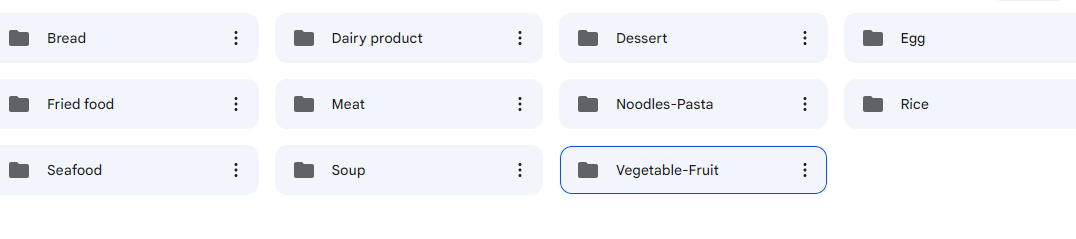

In [ ]:
!pwd

/content


In [ ]:
import pandas as pd
import os
from PIL import Image


#######################################################
#               set your data directory
#######################################################
root_directory = "/content/drive/MyDrive/" # if you save the data to the current root directory, you can leave this variable as it is
dataset_path = root_directory + "cats/"

#######################################################
#             set your data class list
#######################################################
# set your image labels. The class name should be the same as the class folder name under your dataset directory
# class_list = ['Cloudy', 'Foggy', 'Rainy', 'Snowy', 'Sunny']
class_list = ['Cheetah', 'Fox', 'Hyena', 'Lion']



# we generate a dataframe to store all your image pathes and the corresponding labels.
image_name_list = []
image_label = []
print(os.listdir("/"))
for class_name in os.listdir(dataset_path):
    if not class_name.startswith('.'):
        for idx, image in enumerate(os.listdir(dataset_path + class_name + '/')):
            if not image.startswith('.'):
                image_name_list.append(dataset_path + class_name + '/' + image)
                image_label.append(class_name)

dataset_df = pd.DataFrame(columns=["img_name","label"])
dataset_df["img_name"] = image_name_list
dataset_df["label"] = image_label


#######################################################
#                 set your csv name
#######################################################
#    we save the dataframe as a csv file and save it to the root directory of colab
csv_name = 'dataset_csv.csv'
dataset_df.to_csv (root_directory + csv_name, index = False, header=True)
print(dataset_df)

['dev', 'mnt', 'tmp', 'sys', 'media', 'root', 'sbin', 'lib64', 'var', 'lib32', 'home', 'lib', 'bin', 'usr', 'run', 'etc', 'opt', 'srv', 'libx32', 'proc', 'boot', 'content', '.dockerenv', 'tools', 'datalab', 'python-apt', 'NGC-DL-CONTAINER-LICENSE', 'cuda-keyring_1.0-1_all.deb']
                                               img_name  label
0     /content/drive/MyDrive/cats/Lion/00000002_224r...   Lion
1     /content/drive/MyDrive/cats/Lion/00000020_224r...   Lion
2     /content/drive/MyDrive/cats/Lion/00000007_224r...   Lion
3     /content/drive/MyDrive/cats/Lion/00000019_224r...   Lion
4     /content/drive/MyDrive/cats/Lion/00000004_224r...   Lion
...                                                 ...    ...
1137  /content/drive/MyDrive/cats/Hyena/00000497_224...  Hyena
1138  /content/drive/MyDrive/cats/Hyena/00000484_224...  Hyena
1139  /content/drive/MyDrive/cats/Hyena/00000504_224...  Hyena
1140  /content/drive/MyDrive/cats/Hyena/00000473_224...  Hyena
1141  /content/drive/MyDrive

Our objective here is to use the images from your dataset folder and the image filenames, class labels from the csv file to return a (img, label) tuple. This tuple will further be fed to DataLoader.

Dataset is a pytorch utility that allows us to create custom datasets. PIL is a computer vision library that allows us to load images in python.

In [ ]:
from torch.utils.data import Dataset
class CustomeDataset(Dataset):
    def __init__(self, root_dir, annotation_file, class_list, transform=None):
        self.root_dir = root_dir
        self.annotations = pd.read_csv(annotation_file)
        self.class_list = class_list
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, index):
        image_id = self.annotations.iloc[index, 0]
        image = Image.open(os.path.join(self.root_dir, image_id)).convert("RGB")
        label = self.class_list.index(self.annotations.iloc[index, 1])

        if self.transform is not None:
            image = self.transform(image)

        return (image, label)

In [ ]:
import torchvision.transforms as transforms

#######################################################
#        set the image size for training
#######################################################
resize_img = 50

# This  transformation is used to create more data samples from your existng dataset.
# We will later add these transformed samples to the dataset to increase the total number of samples for training.
# This is called data augmentation
transform = transforms.Compose([
                              # set the height or width (which one is smaller) to 100 (the aspect ratio stays the same)
                              transforms.Resize(size=resize_img),
                              # crop the image from the centroid and resize them to 100*100
                              transforms.CenterCrop((resize_img,resize_img)),
                              transforms.ToTensor(),
                              # The first tuple (0.5, 0.5, 0.5) represents the mean values for each channel (red, green, and blue)
                              # the second tuple (0.5, 0.5, 0.5) represents the standard deviation values for each channel
                              transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                              ])



# create your custom Pytorch dataset
dataset = CustomeDataset(root_directory, root_directory + csv_name, class_list, transform=transform)

# Split the dataset and load into pytorch

In this step we will create a training dataset and a testing dataset. The training dataset will be used to train the model while the testing dataset will be later used to test the accuracy.

We first need to decide several issues:
1. the batch size
2. the proportion of the training dataset
3. whether we want to transform the data
4. whether we want to add the transformed dataset back to the original dataset to have an augmented dataset of increased size.

In [ ]:
#######################################################
#        set some parameters to process the data
#######################################################
# load dataset
batch_size = 32
train_percentage = 0.7
augmentation_train_dataset = True
augmentation_merge = True

In [ ]:
import copy
import numpy as np
from torch.utils.data import DataLoader

#######################################################
#       option_1 randomly split the dataset:
#######################################################
# randomly split the dataset.
# train_size = int(train_percentage * len(dataset))
# test_size = len(dataset) - train_size
# train_dataset, test_dataset = torch.utils.data.random_split(dataset,[train_size,test_size])


#######################################################
#       option_2 split the dataset with strafitcation
#######################################################
# You may want to use stratification: https://asq.org/quality-resources/stratification#:~:text=Stratification%20is%20defined%20as%20the,can%20be%20difficult%20to%20see.
from torch.utils.data import Subset
from sklearn.model_selection import train_test_split
# Stratified Sampling for train and val
train_idx, test_idx = train_test_split(np.arange(len(dataset)),
                                        test_size=1-train_percentage,
                                        shuffle=True,
                                        stratify=dataset.annotations.label)

# Subset dataset for train and test
train_dataset = Subset(dataset, train_idx)
test_dataset = Subset(dataset, test_idx)



#######################################################
#        set how to transform the image
#######################################################
# data augmentation
if augmentation_train_dataset:
    # copy the original training dataset and we will augment the copy of the data
    augmented_image = copy.deepcopy(train_dataset)
    # set how to transform the data
    transform_train_augmented = transforms.Compose([
                                          # set the height or width (which one is smaller) to 100 (the aspect ratio stays the same)
                                          transforms.Resize(size=resize_img),
                                          # crop the image from the centroid and resize them to 100*100
                                          transforms.CenterCrop((resize_img,resize_img)),
                                          # Randomly fLips the image w.r.t horizontal axis
                                          transforms.RandomHorizontalFlip(p=0.2),
                                          # Randomly rotates the image to a specified angel
                                          transforms.RandomRotation(10),
                                          # Randomly performs actions like zooms, change shear angles
                                          transforms.RandomAffine(0, shear=10, scale=(0.8,1.2)),
                                          # Randomly change the brightness, contrast, saturation and hue of an image
                                          transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
                                          # comvert the image to tensor so that it can work with torch
                                          transforms.ToTensor(),
                                          # The first tuple (0.5, 0.5, 0.5) represents the mean values for each channel (red, green, and blue)
                                          # the second tuple (0.5, 0.5, 0.5) represents the standard deviation values for each channel
                                          transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                  ])

    # transform the dataset
    augmented_image.dataset.transform = transform_train_augmented

    # you can decide whether to add the augmented data back to the original training dataset
    if augmentation_merge:
        train_dataset = torch.utils.data.ConcatDataset([train_dataset, augmented_image])
    else:
        train_dataset = augmented_image

# load the training dataset and testing dataset into the pytorch dataloader
train_loader = DataLoader(dataset=train_dataset, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(dataset=test_dataset, shuffle=True, batch_size=batch_size)

print(len(train_dataset))
print(len(test_dataset))



1598
343


# Visualize your custom data

The sections below are exactly the same as the Colab we walked through during the lecture.

torch.Size([32, 3, 50, 50])


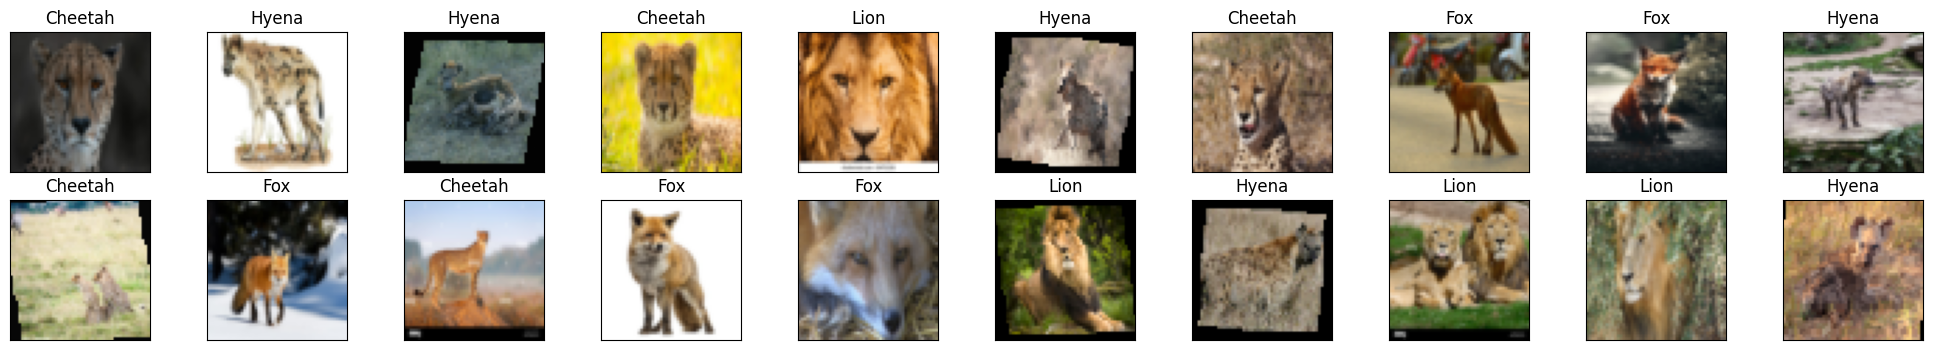

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def im_convert(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    image = np.transpose(npimg, (1, 2, 0))
    return image

# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# check batch size
print(images.shape)

# show images
fig = plt.figure(figsize=(25, 4))
# We plot 20 images from our train_dataset
for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx])) #converting to numpy array as plt needs it.
  ax.set_title(class_list[labels[idx].item()])

# Define and train the classification model

You may want to design your own model architectures. The parameters for layers may be confusing. The best way to understand these parameters is to read the explanations on the Pytorch webstie. You can start to change one or two numbers based on your understanding and then run the code to see your changes are correct. It is also important to learn debug based on the error messages. This [link](https://blog.mlreview.com/a-guide-to-receptive-field-arithmetic-for-convolutional-neural-networks-e0f514068807) should be helpful for you to understand the parameters.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


#######################################################
#        design your CNN architecture
#######################################################

# This line defines a new Python class named Net, which is a neural network model
# It inherits from the nn.Module class, which is a base class for all PyTorch neural network modules
class CNNnet(nn.Module):

    # the constructor method for the Net class
    def __init__(self):

        # super().__init__() calls the constructor of the parent class (nn.Module) to ensure that necessary initialization is performed
        super().__init__()

        # the lines below define the layers in the NN. you could customize the name of the layer by changing the string after the 'self.'
        # This line creates the first convolutional layer (conv1) with 3 input channels (RGB images), 6 output channels and 5 is the convolutional filters size
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=5)

        # This line specifies that max-pooling will be applied with a 2x2 window size and a stride of 2.
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # same as the last convolutional layer
        self.conv2 = nn.Conv2d(in_channels=10, out_channels=16, kernel_size=5)

        # This line creates the first fully connected (linear) layer (fc1).
        # It specifies that it takes an input of size 16 * 5 * 5 (output from the previous convolutional layers) and outputs a tensor of size 120.
        # 9 = ((50-(7-1))/2-(5-1))/2. For more information, you can refer to https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html
        self.fc1 = nn.Linear(16 * 9 * 9, 120)

        # same as the last linear layer but with an input size of 120 and an output size of 84.
        self.fc2 = nn.Linear(120, 84)

        # same as the last linear layer but with an input size of 84 and an output size of 10 (which is the total number of classes).
        self.fc3 = nn.Linear(84, 4)


    # The forward method is where the actual computation of the neural network occurs.
    def forward(self, x):
        # F is typically an alias for the PyTorch module torch.nn.
        # you could also add relu layer in the model architecture configuration part
        x = F.relu(self.conv1(x))

        #  It performs max-pooling on the ReLU-activated feature map using the pool layer defined earlier.
        x = self.pool(x)

        # same as above
        x = F.relu(self.conv2(x))
        x = self.pool(x)

        # flatten all dimensions except batch. It converts the 2D feature maps from the convolutional layers into a 1D tensor suitable
        x = torch.flatten(x, 1)

        # We apply the ReLU activation function to the result of the first fully connected layer
        x = F.relu(self.fc1(x))

        # We apply the ReLU activation function to the result of the second fully connected layer
        x = F.relu(self.fc2(x))

        # We apply the third fully connected layer (fc3) to the output of the previous layer
        x = self.fc3(x)

        # return the tensor x, which contains the model's output after passing through all the layers
        return x


In [ ]:
# initiate a model
model = CNNnet().to(device)
print(model)


CNNnet(
  (conv1): Conv2d(3, 10, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(10, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=1296, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=4, bias=True)
)


In [ ]:
import torch.optim as optim
#######################################################
#      set loss function and optimization method
#######################################################
# nn.CrossEntropyLoss() is commonly used as a loss function for classification problems.
criterion = nn.CrossEntropyLoss()
# we use Stochastic Gradient Descent (SGD) optimizer to update the weights
# lr: the learning rate for the optimizer. The learning rate determines the step size at which the optimizer updates the model's parameters during training.
# Try increasing or decreasing the lr and see how this affects training.
# momentum: Momentum helps accelerate the optimization process by adding a fraction of the previous gradient to the current gradient update.
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)



In [ ]:
# create two empty lists to store loss and accuracy history
# if you run the training cell below many times, the history will accumulate so that you can easily plot the whole training history with the visualization code
running_loss_history = []
running_corrects_history = []

In [ ]:
PATH = '/content/drive/MyDrive/model_10.pth'
model = torch.load(PATH)

In [ ]:
#set the number of epochs you want to train. If you don't see that your loss is converging, it might be a good idea to train for more epochs.
total_epoch = 10

# loop over the dataset multiple times
for epoch in range(total_epoch):
    running_loss = 0.0
    running_corrects = 0.0

    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # to method is used to transfer the input data to a specified computing device, such as a GPU or a CPU.
        inputs = inputs.to(device)
        labels = labels.to(device)
        # print(inputs.shape)

        # zero the parameter gradients
        # gradients are computed for all learnable parameters. These gradients are accumulated (added up) across multiple iterations if they are not cleared.
        # By zeroing out the gradients, we ensure that the gradients are fresh and only based on the current batch of data.
        optimizer.zero_grad()

        # forward + backward + optimize
        # forward:
        outputs = model(inputs)
        # calculate the loss

        # print(outputs.shape)
        # print(labels.shape)

        loss = criterion(outputs, labels)

        # backward
        loss.backward()
        # optimize
        optimizer.step()

        # calculate accuracy and loss
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1) # taking the highest value of prediction.
        running_corrects += (predicted == labels).sum().item() # calculating the corrected pair by taking the sum of all the correct predictions in a batch.

    # average batch loss per epoch
    epoch_loss = running_loss / len(train_loader)
    # accuracy per epoch
    epoch_acc = running_corrects / len(train_loader.dataset)
    # appending for displaying
    running_loss_history.append(epoch_loss)
    running_corrects_history.append(epoch_acc)

    # print statistics
    print('epoch :', (epoch+1))
    print('training loss: {:.4f}, accuracy {:.4f} '.format(epoch_loss, epoch_acc))

print('Finished Training')
torch.save(model, PATH)

epoch : 1
training loss: 1.3807, accuracy 0.2678 
epoch : 2
training loss: 1.3799, accuracy 0.2678 
epoch : 3
training loss: 1.3795, accuracy 0.2685 
epoch : 4
training loss: 1.3789, accuracy 0.2722 
epoch : 5
training loss: 1.3782, accuracy 0.2703 
epoch : 6
training loss: 1.3771, accuracy 0.2722 
epoch : 7
training loss: 1.3757, accuracy 0.2816 
epoch : 8
training loss: 1.3743, accuracy 0.2854 
epoch : 9
training loss: 1.3730, accuracy 0.3016 
epoch : 10
training loss: 1.3708, accuracy 0.2966 
Finished Training


# Visualize the loss

In [ ]:
# plot the losss curve
epochs = list(range(1, len(running_loss_history) + 1))
fig, ax = plt.subplots(figsize=(4, 3))
plt.plot(epochs, running_loss_history , color='r')
plt.title('Loss Graph')
plt.legend(["Train Loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
ax.grid(True)

# plot the accuracy curve
fig, ax = plt.subplots(figsize=(4, 3))
plt.plot(epochs, running_corrects_history , color='g')
plt.title('Accuracy Graph')
plt.legend(["Training Accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
ax.grid(True)


# Evaluate the model with test dataset

In [ ]:
# Evaluate the overall accurcay for each class
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)

        # calculate outputs by running images through the network
        outputs = model(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images after training for {total_epoch} epochs: {100 * correct // total} %')

In [ ]:
# Evaluate the accurcay for each class

# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in class_list}
total_pred = {classname: 0 for classname in class_list}

# again no gradients needed
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[class_list[label]] += 1
            total_pred[class_list[label]] += 1

# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: Cloudy is 73.3 %
Accuracy for class: Foggy is 93.3 %
Accuracy for class: Rainy is 56.2 %
Accuracy for class: Snowy is 60.0 %
Accuracy for class: Sunny is 66.7 %


Accuracy of the network on the first batch of test images: 53 %


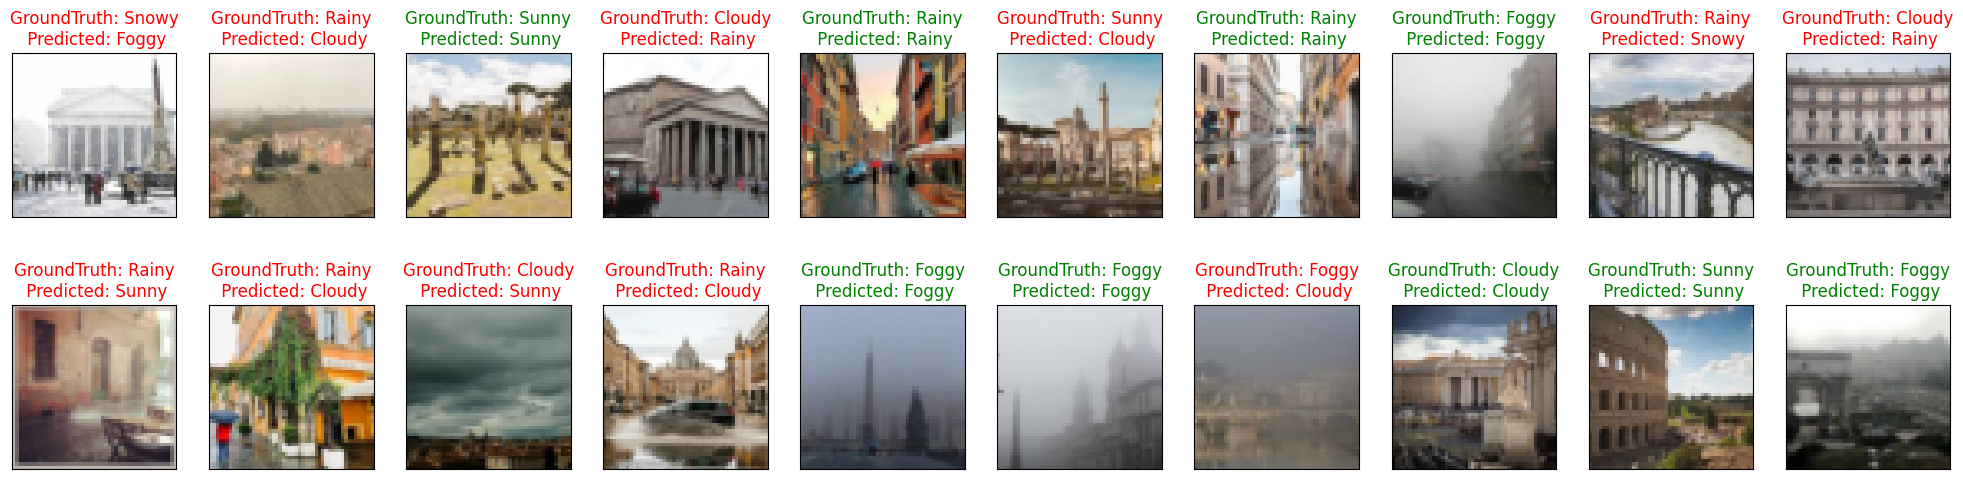

In [ ]:
# visualize some testing result

test_dataiter = iter(test_loader)
test_images, test_labels = next(test_dataiter)

outputs = model(test_images.to(device))
_, predicted = torch.max(outputs, 1)
correct = 0
correct += (predicted == test_labels.to(device)).sum().item()
print(f'Accuracy of the network on the first batch of test images: {100 * correct // batch_size} %')

# show images
fig = plt.figure(figsize=(25, 6))
# We plot 20 images from our test_dataset
for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(test_images[idx])) #converting to numpy array as plt needs it.
  ax.set_title('GroundTruth: ' + class_list[test_labels[idx].item()] + '\n Predicted: '+ class_list[predicted[idx].item()], color=("green" if predicted[idx]==test_labels[idx] else "red"))



If you get a very high training accuracy but the accuracy on the test dataset is much lower. This is a typical [overfitting](https://en.wikipedia.org/wiki/Overfitting) problem and we will learn more about this issue later in the class.

# Save model

In [ ]:
#######################################################
#      set model saving path
#######################################################
PATH = '/content/drive/MyDrive/your_first_CNNnet.pth'
torch.save(model, PATH)

model_1 = torch.load(PATH)

Now it is your magic time!

# Reference
- https://rumn.medium.com/how-to-create-a-custom-pytorch-dataset-with-a-csv-file-e64b89bc2dcc
- https://medium.com/mlearning-ai/building-custom-datasets-for-pytorch-deep-learning-image-classification-29989971652d
- https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
- https://www.cs.toronto.edu/~kriz/cifar.html
- https://medium.com/swlh/how-data-augmentation-improves-your-cnn-performance-an-experiment-in-pytorch-and-torchvision-e5fb36d038fb